<a href="https://colab.research.google.com/github/51616/denoise_generated_text/blob/master/generate_and_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you run this notebook on Colab, uncomment and run this cell

In [0]:
# If you run this notebook on Colab, uncomment and run this cell
# from IPython.display import clear_output
# !wget -O denoise_generated_text.zip https://github.com/51616/denoise_generated_text/archive/master.zip
# !unzip denoise_generated_text.zip
# !mv denoise_generated_text-master/bgs bgs
# !mv denoise_generated_text-master/fonts fonts
# !mv denoise_generated_text-master/words words
# clear_output()

# Generate our dataset

In [0]:
from PIL import Image, ImageDraw, ImageFont
from random import randint, choice, uniform
from tqdm import tqdm
import matplotlib.pyplot as plt
import glob
import numpy as np

!mkdir -p gen_data/{train,train_cleaned,test,test_cleaned,val,val_cleaned}/english

In [0]:
def load_words():
    with open('words/words_alpha.txt') as word_file:
        word_list = word_file.read().split()
    return word_list

  
english_words = load_words()

In [0]:
width = 400
height = 300
n_lines = 6
n_words = 3

In [0]:
bg_files = glob.glob('bgs/*.jpg')
bgs = [Image.open(bg).resize((width,height)) for bg in bg_files]

test_bg_files = glob.glob('bgs/test/*.jpg')
test_bgs = [Image.open(bg).resize((width,height)) for bg in test_bg_files]

In [0]:
train_img_num = 10000
val_img_num = 1000
test_img_num = 1000

## Generate test images

In [7]:
#Generate test images
white_bg = Image.new('RGB', (width, height) , (255,255,255))

#English words
for n in tqdm(range(test_img_num)):
  #strike_bg = Image.new('RGB', (width, height) , (255,255,255)) 
  clean_bg = white_bg.copy()
  bg = choice(test_bgs).copy()


  # get a font
  font_size = (randint(30, 80))
  font = ImageFont.truetype('fonts/Times New Roman.ttf', font_size)
  # get a drawing context
  #strike = ImageDraw.Draw(strike_bg)
  d = ImageDraw.Draw(bg)
  d2 = ImageDraw.Draw(clean_bg)


  for i in range(n_lines):
    line = ''
    for j in range(n_words):
        line += choice(english_words) + '  '
    y = i*(font_size + font_size/5)
    d.text((0,y), line, font=font, fill=(0,0,0))
    d2.text((0,y), line, font=font, fill=(0,0,0))
  clean_bg.save('gen_data/test_cleaned/english/%d.jpg' % n)
  
  for j in range(n_lines):
    brightness = randint(0,255)
    r = randint(0,brightness)
    g = randint(0,brightness)
    b = randint(0,brightness)
    w = randint(1,5)
    y = j*(font_size + font_size/5)
    d.line( [(randint(0,width)), y+font_size*uniform(0.5,0.8),
             (randint(0,width)), y+font_size*uniform(0.5,0.8)],
           width=w , fill=(r,g,b))
  bg.save('gen_data/test/english/%d.jpg' % n)
  #plt.imshow(bg)
  #plt.show()

100%|██████████| 1000/1000 [00:38<00:00, 26.19it/s]


## Generate train images

In [8]:
#Generate training images
# make a blank image for the tex
white_bg = Image.new('RGB', (width, height) , (255,255,255))

for n in tqdm(range(train_img_num)):
  #strike_bg = Image.new('RGB', (width, height) , (255,255,255)) 
  clean_bg = white_bg.copy()
  bg = choice(bgs).copy()


  # get a font
  font_size = (randint(30, 80))
  font = ImageFont.truetype('fonts/Times New Roman.ttf', font_size)
  # get a drawing context
  #strike = ImageDraw.Draw(strike_bg)
  d = ImageDraw.Draw(bg)
  d2 = ImageDraw.Draw(clean_bg)


  for i in range(n_lines):
    line = ''
    for j in range(n_words):
        line += choice(english_words) + '  '
    y = i*(font_size + font_size/5)
    d.text((0,y), line, font=font, fill=(0,0,0))
    d2.text((0,y), line, font=font, fill=(0,0,0))
  clean_bg = clean_bg.convert('L')
#   plt.imshow(clean_bg,cmap='gray')
#   plt.show()
  
  clean_bg = np.array(clean_bg)
#   print(clean_bg.shape)
#   print(clean_bg)
  clean_bg[clean_bg<128] = 0
  clean_bg[clean_bg>=128] = 255
  clean_bg = Image.fromarray(clean_bg)
#   plt.imshow(clean_bg, cmap='gray')
#   plt.show()
  clean_bg.save('gen_data/train_cleaned/english/%d.jpg' % n)

#   print(clean_bg)
#   plt.imshow(clean_bg,cmap='gray')
#   plt.show()
  for j in range(n_lines):
    brightness = randint(0,255)
    r = randint(0,brightness)
    g = randint(0,brightness)
    b = randint(0,brightness)
    w = randint(1+ round(2*(font_size-30)/50),4 + round(2*(font_size-30)/50) ) 
    y = j*(font_size + font_size/5)
    d.line( [(randint(0,width)), y+font_size*uniform(0.4,0.8),
             (randint(0,width)), y+font_size*uniform(0.4,0.8)],
           width=w , fill=(r,g,b))
  bg.save('gen_data/train/english/%d.jpg' % n)
#   plt.imshow(bg)
#   plt.show()

100%|██████████| 10000/10000 [06:15<00:00, 26.84it/s]


## Generate validation images

In [9]:
#Generate validation images
# make a blank image for the tex
white_bg = Image.new('RGB', (width, height) , (255,255,255))

for n in tqdm(range(val_img_num)):
  #strike_bg = Image.new('RGB', (width, height) , (255,255,255)) 
  clean_bg = white_bg.copy()
  bg = choice(bgs).copy()


  # get a font
  font_size = (randint(30, 80))
  font = ImageFont.truetype('fonts/Times New Roman.ttf', font_size)
  # get a drawing context
  #strike = ImageDraw.Draw(strike_bg)
  d = ImageDraw.Draw(bg)
  d2 = ImageDraw.Draw(clean_bg)


  for i in range(n_lines):
    line = ''
    for j in range(n_words):
        line += choice(english_words) + '  '
    y = i*(font_size + font_size/5)
    d.text((0,y), line, font=font, fill=(0,0,0))
    d2.text((0,y), line, font=font, fill=(0,0,0))
  clean_bg = clean_bg.convert('L')
#   plt.imshow(clean_bg,cmap='gray')
#   plt.show()
  
  clean_bg = np.array(clean_bg)
#   print(clean_bg.shape)
#   print(clean_bg)
  clean_bg[clean_bg<128] = 0
  clean_bg[clean_bg>=128] = 255
  clean_bg = Image.fromarray(clean_bg)
#   plt.imshow(clean_bg, cmap='gray')
#   plt.show()
  clean_bg.save('gen_data/val_cleaned/english/%d.jpg' % n)

#   print(clean_bg)
#   plt.imshow(clean_bg,cmap='gray')
#   plt.show()
  for j in range(n_lines):
    brightness = randint(0,255)
    r = randint(0,brightness)
    g = randint(0,brightness)
    b = randint(0,brightness)
    w = randint(1+ round(2*(font_size-30)/50),4 + round(2*(font_size-30)/50) ) 
    y = j*(font_size + font_size/5)
    d.line( [(randint(0,width)), y+font_size*uniform(0.4,0.8),
             (randint(0,width)), y+font_size*uniform(0.4,0.8)],
           width=w , fill=(r,g,b))
  bg.save('gen_data/val/english/%d.jpg' % n)
#   plt.imshow(bg)
#   plt.show()

100%|██████████| 1000/1000 [00:37<00:00, 26.30it/s]


# Create and train model

In [0]:
import os
from pathlib import Path
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
from PIL import Image
from tqdm import tqdm

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms.functional as TF
import random
# from torchsummary import summary



plt.rcParams["axes.grid"] = False
np.random.seed(111)

In [0]:
data_transforms = transforms.Compose([
    #transforms.Resize(150),
    transforms.ToTensor()
])

data_transforms_gray = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])



INPUT = ['train', 'val', 'test']
TARGET = ['train_cleaned','val_cleaned', 'test_cleaned']

def get_loader(data_dir='gen_data', batch_size=32):

  img_folder = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms) for x in INPUT}
  clean_img_folder = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms_gray) for x in TARGET}


  img_loader = {x: torch.utils.data.DataLoader(img_folder[x], batch_size=BATCH_SIZE, shuffle=False, num_workers=0) for x in INPUT}
  clean_img_loader = {x: torch.utils.data.DataLoader(clean_img_folder[x], batch_size=BATCH_SIZE, shuffle=False, num_workers=0) for x in TARGET}

  dataset_sizes = {x: len(img_loader[x]) for x in INPUT}
  
  return img_loader, clean_img_loader, dataset_sizes

  

In [0]:
BATCH_SIZE = 16
DIR = 'gen_data'
img_loader, clean_img_loader, dataset_sizes = get_loader(DIR, BATCH_SIZE)

In [0]:

class ten_layer_autoencoder(nn.Module):
  def __init__(self):
    super(ten_layer_autoencoder,self).__init__()
    
    self.c1 = nn.Conv2d(3, 64, kernel_size=(3, 3), padding=1)
    self.bn_c1 = nn.BatchNorm2d(64)
    self.c2 = nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1)
    self.bn_c2 = nn.BatchNorm2d(64)
    
    self.s3 = nn.MaxPool2d(kernel_size=(2, 2), return_indices=True)
    
    self.c4 = nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1)
    self.bn_c4 = nn.BatchNorm2d(64)
    self.c5 = nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1)
    self.bn_c5 = nn.BatchNorm2d(64)
    
    self.s6 = nn.MaxPool2d(kernel_size=(2, 2), return_indices=True)
    self.c7 = nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1)
    self.bn_c7 = nn.BatchNorm2d(64)
    
    self.c8 = nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1)
    self.bn_c8 = nn.BatchNorm2d(64)
    
    self.c10 = nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1)
    self.bn_c10 = nn.BatchNorm2d(64)
    self.c11 = nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1)
    self.bn_c11 = nn.BatchNorm2d(64)
    
    
    self.c13 = nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1)
    self.bn_c13 = nn.BatchNorm2d(64)
    self.c14 = nn.Conv2d(64, 1, kernel_size=(3, 3), padding=1)
    self.bn_c14 = nn.BatchNorm2d(1)
    
    
    
  def forward(self,x, debug=False):
    
    x = F.relu(self.bn_c1(self.c1(x)))
    x = F.relu(self.bn_c2(self.c2(x)))
    res1 = x
    size1 = x.size()
    x, i1 = self.s3(x)

    x = F.relu(self.bn_c4(self.c4(x)))
    x = F.relu(self.bn_c5(self.c5(x)))
    res2 = x
    size2 = x.size()
    x, i2 = self.s6(x)
    
    x = F.relu(self.bn_c7(self.c7(x)))
    x = F.relu(self.bn_c8(self.c8(x)))

    x = F.interpolate(x, size = size2[2:], mode='bilinear')
    x = x + res2
    x = F.relu(self.bn_c10(self.c10(x)))
    x = F.relu(self.bn_c11(self.c11(x)))
    
    x = F.interpolate(x, size = size1[2:], mode='bilinear')
    x = x + res1
    x = F.relu(self.bn_c13(self.c13(x)))
    x = torch.sigmoid(self.c14(x))
    
    return x

In [0]:
def fit_model(net=None, optimizer=None, scheduler=None, criterion=None, check_it=100, output_model_file='best_model'):
  train_loss_log = []
  val_loss_log = []
  
  print('== Start Training ==')

  best_loss = float('Inf')
  output_model_file = output_model_file + '.pth'

  training_loss = 0
  val_loss = 0

  for iteration, (train, clean) in tqdm( enumerate(zip(img_loader['train'],clean_img_loader['train_cleaned'])),total=dataset_sizes['train'],position=0 ):
    img, img_clean = train[0].cuda(), clean[0].cuda()
    
    #training
    net.train()
    optimizer.zero_grad()
    output = net(img)
    loss = criterion(output, img_clean)
    loss.backward()
    optimizer.step()
    training_loss+=loss.item()
    train_loss_log.append(loss.item())

    if((iteration+1)%check_it == 0):
      #validation
      net.eval()
      with torch.no_grad():
        for i, (val, val_cleaned) in enumerate(zip(img_loader['val'],clean_img_loader['val_cleaned'])):
          img, img_clean = val[0].cuda(), val_cleaned[0].cuda()
          output = net(img)
          loss = criterion(output, img_clean)
          val_loss+=loss.item()
          
        val_loss = val_loss/len(img_loader['val'])
        val_loss_log.append(val_loss)
        
      #report validation
      training_loss = training_loss/check_it
      print()
      print(iteration+1,'/',len(img_loader['train']), 'Training Loss :',training_loss,'Validation loss :',val_loss)
      
      # Loss decrease, we should save the model
      if (val_loss < best_loss):
        print('Saving..')
        best_loss = val_loss
        state = {
            'model': net.state_dict(),
            'loss': best_loss,
            'iteration': iteration,
            'optimizer': optimizer.state_dict(),
            'scheduler': scheduler.state_dict()
        }
        torch.save(state, output_model_file)
        
      # plot validation input image, prediction and actual target
      f,ax = plt.subplots(1, 3, figsize=(20,10))
      idx = 1 #random.randint(0,15)
      input_img = img.cpu().detach().numpy()[idx]
      ax[0].imshow(input_img.transpose(1,2,0)) # .reshape(300,400,3)

      pred = output.cpu().detach().numpy()[idx]
      ax[1].imshow(pred.transpose(1,2,0)[:,:,0], cmap='gray') # .reshape(300,400,3)

      target = img_clean.cpu().detach().numpy()[idx]
      ax[2].imshow(target.transpose(1,2,0)[:,:,0], cmap='gray') #.reshape(300,400,3)
      plt.show()
        
      #update lr and reset loss
      scheduler.step(val_loss)
      training_loss=0
      val_loss=0
      
      
  #test after training
  test_loss = 0
  net.eval()
  with torch.no_grad():
    for i, (test, test_cleaned) in enumerate(zip(img_loader['test'],clean_img_loader['test_cleaned'])):
      img, img_clean = test[0].cuda(), test_cleaned[0].cuda()
      output = net(img)
      loss = criterion(output, img_clean)
      test_loss+=loss.item()
  
  print()
  print('Test Loss :',test_loss/len(img_loader['test']) )
  f, ax = plt.subplots(1, 3, figsize=(20,10))
  idx = 1 #random.randint(0,15)
  input_img = img.cpu().detach().numpy()[idx]
  ax[0].imshow(input_img.transpose(1,2,0)) # .reshape(300,400,3)

  pred = output.cpu().detach().numpy()[idx]
  ax[1].imshow(pred.transpose(1,2,0)[:,:,0], cmap='gray') # .reshape(300,400,3)

  target = img_clean.cpu().detach().numpy()[idx]
  ax[2].imshow(target.transpose(1,2,0)[:,:,0], cmap='gray') #.reshape(300,400,3)
  plt.show()

  print('== FINISHED ==')
  return train_loss_log, val_loss_log, test_loss

def model_pred(net=None,path=None):
  with torch.no_grad():
    inputImage = Image.open(path)
    inputImageTensor = data_transforms(inputImage).unsqueeze(0).cuda()
    output = net(inputImageTensor).cpu().detach().numpy()[0]
  return output

def save_log(train_log, val_loss, filename='model_log'):
  logs = {
      'train_loss' : train_log,
      'val_loss' : val_log,
  }
  
  pickle.dump(logs, open(filename + ".p", "wb" ))

  0%|          | 0/625 [00:00<?, ?it/s]

== Start Training ==


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
 20%|█▉        | 124/625 [01:18<05:19,  1.57it/s]


125 / 625 Training Loss : 0.1067319205403328 Validation loss : 0.04685062625341945
Saving..


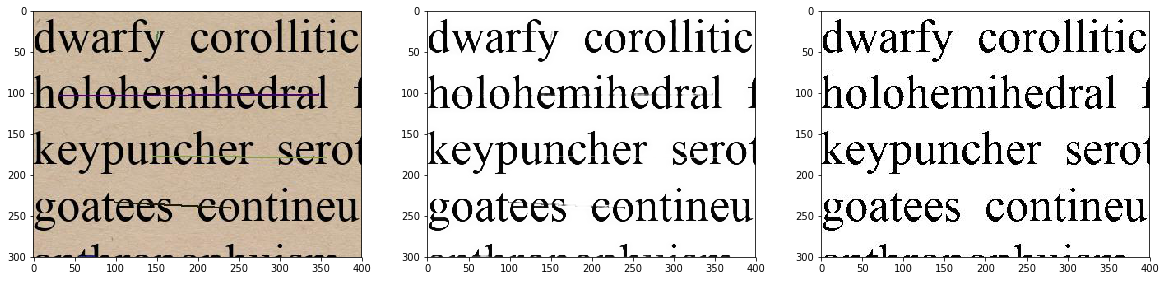

 40%|███▉      | 249/625 [02:56<04:07,  1.52it/s]


250 / 625 Training Loss : 0.04242594388127327 Validation loss : 0.04184246418021974
Saving..


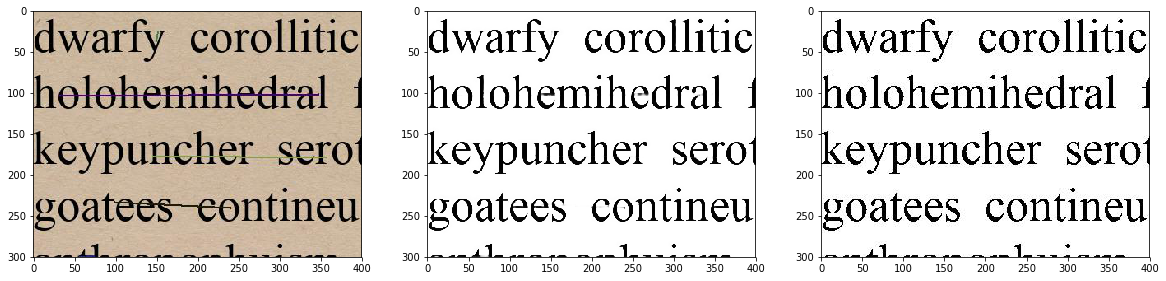

 60%|█████▉    | 374/625 [04:36<02:47,  1.50it/s]


375 / 625 Training Loss : 0.03961804383993149 Validation loss : 0.03911230275555262
Saving..


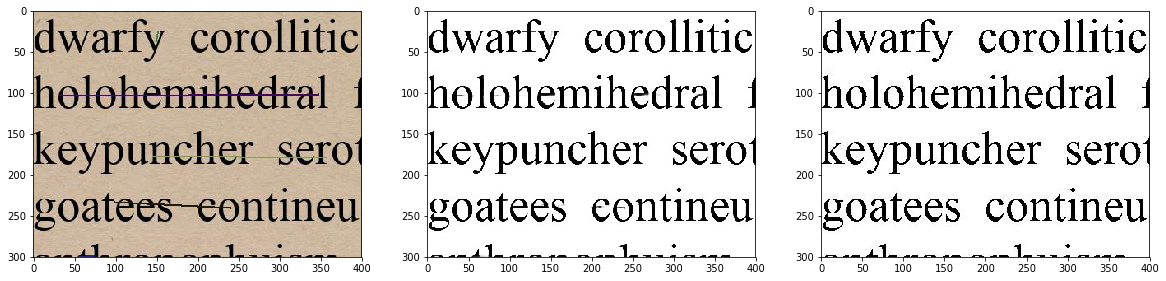

 80%|███████▉  | 499/625 [06:18<01:25,  1.48it/s]


500 / 625 Training Loss : 0.0383807615339756 Validation loss : 0.037719835187234575
Saving..


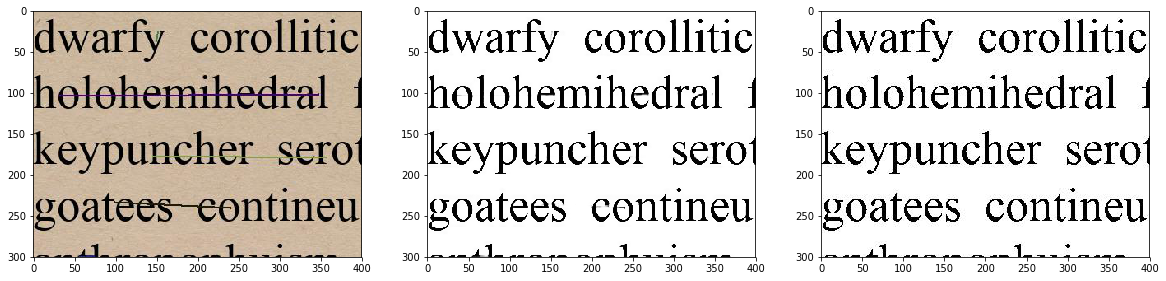

100%|█████████▉| 624/625 [08:00<00:00,  1.47it/s]


625 / 625 Training Loss : 0.037398063868284225 Validation loss : 0.0371877397927973
Saving..


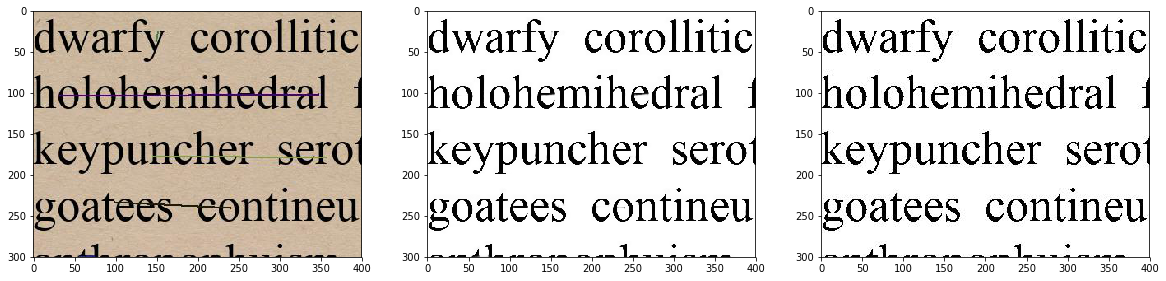

100%|██████████| 625/625 [08:18<00:00,  5.87s/it]



Test Loss : 0.08357071722783739


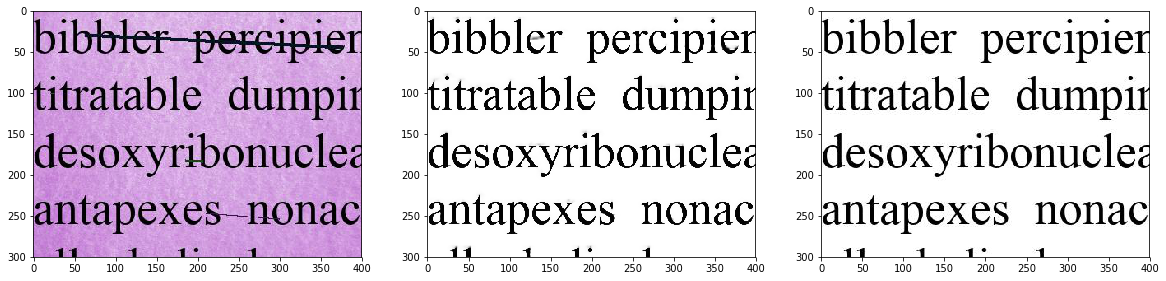

== FINISHED ==


In [15]:
CHECK_IT = 125
net = ten_layer_autoencoder().cuda().train()
criterion = nn.BCELoss(reduction='mean')
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.2, patience=3, threshold=1e-4,  min_lr=0.00001)

train_log, val_log, test_loss = fit_model(net, optimizer, scheduler, criterion, CHECK_IT)

net.eval()
save_log(train_log, val_log)


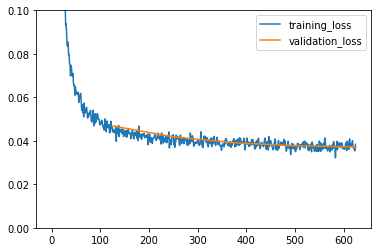

In [16]:
plt.plot(np.arange(len(train_log)), train_log, label='training_loss')
plt.plot(np.arange(CHECK_IT,len(val_log)*CHECK_IT+1,CHECK_IT), val_log, label='validation_loss')
plt.ylim(0,0.1)
plt.legend()